# Missing Migrants Project

## I hope you enjoy this kernel. This is not only meant to be a demonstration kernel, but also a tool to learn more about these events. They are tragedies that happen every day, we should at least know them, to prevent them from happening again.

Missing Migrants Project tracks deaths of migrants, including refugees and asylum-seekers, who have died or gone missing in the process of migration towards an international destination. 
## Please note that these data represent minimum estimates, as many deaths during migration go unrecorded. 
#### The downloads below are licensed under a Creative Commons Attribution 4.0 International License. 
This means that Missing Migrants Project data are free to share and adapt, as long as the appropriate attribution is given. This includes stating that the source is 'IOM's Missing Migrants Project', and indicating if changes were made to the data. Ideally, a link to this website should also be included.

|Variable Name|Description|
|-------------|-----------|
|Web ID|An automatically generated number used to identify each unique entry in the dataset.|
|Region of incident|The region in which an incident took place.|
|Reported date|Estimated date of death. In cases where the exact date of death is not known, this variable indicates the date in which the body or bodies were found. In cases where data are drawn from surviving migrants, witnesses or other interviews, this variable is entered as the date of the death as reported by the interviewee.  At a minimum, the month and the year of death is recorded. In some cases, official statistics are not disaggregated by the incident, meaning that data is reported as a total number of deaths occurring during a certain time period. In such cases the entry is marked as a “cumulative total,” and the latest date of the range is recorded, with the full dates recorded in the comments.
|Reported year|The year in which the incident occurred.
|Reported month|The month in which the incident occurred.
|Number dead|The total number of people confirmed dead in one incident, i.e. the number of bodies recovered.  If migrants are missing and presumed dead, such as in cases of shipwrecks, leave blank.
|Number missing |The total number of those who are missing and are thus assumed to be dead.  This variable is generally recorded in incidents involving shipwrecks.  The number of missing is calculated by subtracting the number of bodies recovered from a shipwreck and the number of survivors from the total number of migrants reported to have been on the boat.  This number may be reported by surviving migrants or witnesses.  If no missing persons are reported, it is left blank.
|Total dead and missing|The sum of the ‘number dead’ and ‘number missing’ variables.
|Number of survivors|The number of migrants that survived the incident, if known. The age, gender, and country of origin of survivors are recorded in the ‘Comments’ variable if known. If unknown, it is left blank
|Number of females|Indicates the number of females found dead or missing. If unknown, it is left blank.
|Number of males|Indicates the number of males found dead or missing. If unknown, it is left blank.
|Number of children|Indicates the number of individuals under the age of 18 found dead or missing. If unknown, it is left blank.
|Country of origin|Country of birth of the decedent. If unknown, the entry will be marked “unknown”.
|Region of origin|Region of origin of the decedent(s). In some incidents, region of origin may be marked as “Presumed” or “(P)” if migrants travelling through that location are known to hail from a certain region. If unknown, the entry will be marked “unknown”.
|Cause of death|The determination of conditions resulting in the migrant's death i.e. the circumstances of the event that produced the fatal injury. If unknown, the reason why is included where possible.  For example, “Unknown – skeletal remains only”, is used in cases in which only the skeleton of the decedent was found.
|Location description|Place where the death(s) occurred or where the body or bodies were found. Nearby towns or cities or borders are included where possible. When incidents are reported in an unspecified location, this will be noted.
|Location coordinates|Place where the death(s) occurred or where the body or bodies were found. In many regions, most notably the Mediterranean, geographic coordinates are estimated as precise locations are not often known. The location description should always be checked against the location coordinates.
|Migration route|Name of the migrant route on which incident occurred, if known. If unknown, it is left blank.
|UNSD geographical grouping|Geographical region in which the incident took place, as designated by the United Nations Statistics Division (UNSD) geoscheme.
|Source quality|Incidents are ranked on a scale from 1-5 based on the source(s) of information available. Incidents ranked as level 1 are based on information from only one media source. Incidents ranked as level 2 are based on information from uncorroborated eyewitness accounts or data from survey respondents. Incidents ranked as level 3 are based on information from multiple media reports, while level 4 incidents are based on information from at least one NGO, IGO, or another humanitarian actor with direct knowledge of the incident. Incidents ranked at level 5 are based on information from official sources such as coroners, medical examiners, or government officials OR from multiple humanitarian actors.
|Comments|Brief description narrating additional facts about the death.  If no extra information is available, this is left blank.

### For more info:
#### 1) http://missingmigrants.iom.int/methodology
#### 2) https://missingmigrants.iom.int/regional-classifications
#### 3) https://www.iom.int/
#### 4) https://gmdac.iom.int/

## If you liked the kernel, please give me an upvote.
#### NOTE: This is an alpha version. I will update the kernel with more information. I'm still doing research.

# 1. Importing modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import re
from mpl_toolkits.basemap import Basemap

# 2. Defining Functions

In [2]:
def missingData(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    md = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    md = md[md["Percent"] > 0]
    sns.set(style = 'darkgrid')
    plt.figure(figsize = (8, 4))
    plt.xticks(rotation='90')
    sns.barplot(md.index, md["Percent"],color="g",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return md

def valueCounts(dataset, features):
    """Display the features value counts """
    for feature in features:
        vc = dataset[feature].value_counts()
        print(vc)
        print('-'*30)

# 3. Open the dataframe

In [3]:
raw_data = pd.read_csv('../input/MissingMigrants-Global-2019-03-29T18-36-07.csv')

In [4]:
raw_data.head(3)

,Web ID,Region of Incident,Reported Date,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Location Description,Information Source,Location Coordinates,Migration Route,URL,UNSD Geographical Grouping,Source Quality
0,51591,Mediterranean,"March 28, 2019",2019,Mar,NaN,2.0,2,36.0,NaN,2.0,NaN,Presumed drowning,"Off the coast of Chios, Greece",Hellenic Coast Guard via IOM Greece,"38.362368696592, 26.172509473654",Eastern Mediterranean,NaN,Uncategorized,5
1,51588,Mediterranean,"March 26, 2019",2019,Mar,4.0,NaN,4,11.0,3.0,NaN,1.0,Presumed drowning,"Off the coast of Ayvacık district, Çanakkale p...",Turkish Coast Guard via IOM Turkey,"39.441975591614, 26.378816195919",Eastern Mediterranean,http://bit.ly/2YmiPAN,Uncategorized,5
2,51589,Mediterranean,"March 26, 2019",2019,Mar,1.0,NaN,1,NaN,NaN,NaN,NaN,Presumed drowning,"Body recovered on Playa del Tarajal, Ceuta, Sp...","Ceuta al día, El Pueblo de Ceuta","35.871901875921, -5.343037665842",Western Mediterranean,"http://bit.ly/2uyj7qO, http://bit.ly/2uwj5zC",Uncategorized,3


# 4. Checking the Missing Values

In [5]:
raw_data.shape

(5333, 20)

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5333 entries, 0 to 5332
Data columns (total 20 columns):
Web ID                                 5333 non-null int64
Region of Incident                     5333 non-null object
Reported Date                          5333 non-null object
Reported Year                          5333 non-null int64
Reported Month                         5333 non-null object
Number Dead                            5142 non-null float64
Minimum Estimated Number of Missing    503 non-null float64
Total Dead and Missing                 5333 non-null int64
Number of Survivors                    749 non-null float64
Number of Females                      897 non-null float64
Number of Males                        2813 non-null float64
Number of Children                     644 non-null float64
Cause of Death                         5333 non-null object
Location Description                   5323 non-null object
Information Source                     5331 non-null o

,Total,Percent
Minimum Estimated Number of Missing,4830,90.568161
Number of Children,4689,87.924245
Number of Survivors,4584,85.955372
Number of Females,4436,83.180199
Migration Route,2673,50.121883
Number of Males,2520,47.252953
URL,2141,40.146259
Number Dead,191,3.581474
UNSD Geographical Grouping,11,0.206263
Location Description,10,0.187512


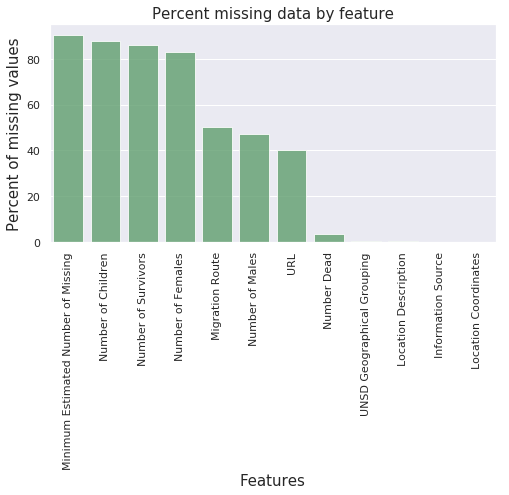

In [7]:
missingData(raw_data)

In [8]:
f = ['Region of Incident', 'Migration Route']

In [9]:
valueCounts(raw_data, f)

US-Mexico Border      1337
North Africa          1239
Mediterranean          984
Sub-Saharan Africa     475
Central America        309
Europe                 249
Horn of Africa         235
Middle East            164
South Asia             151
Southeast Asia          96
Caribbean               59
South America           28
East Asia                5
Central Asia             1
North America            1
Name: Region of Incident, dtype: int64
------------------------------
Central America to US                        1507
Central Mediterranean                         499
Western Mediterranean                         255
Eastern Mediterranean                         230
Western Balkans                                64
Calais to United Kingdom                       51
Western African                                15
Horn Africa to Yemen                           15
Italy to France                                 9
Darien Gap                                      7
Caribbean to Central Amer

# 5. Preprocessing the data

#### First, I create a copy of the dataset

In [10]:
data = raw_data.copy()

#### At this point, I convert the dates to datetime

In [11]:
def convert_date(s):
    new_s = datetime.datetime.strptime(s, '%B %d, %Y')
    return new_s

In [12]:
data['Date'] = data['Reported Date'].apply(convert_date)

#### Now I separate the geographic coordinates, so that they can be subsequently applied for a geographical visualization.

In [13]:
data['Lat'], data['Lon'] = data['Location Coordinates'].str.split(', ').str

In [14]:
data.Lat = data.Lat.astype(float)
data.Lon = data.Lon.astype(float)

#### Now I replace the NaN values of the 'Number Dead' and 'Minimum Estimated Number of Missing' features with 0.
## Warning!
### I want to remind you that these datasets, although accurate, represent the estimated minimums.
|Variable Name|Description|
|-------------|-----------|
|Number dead|The total number of people confirmed dead in one incident, i.e. the number of bodies recovered.  If migrants are missing and presumed dead, such as in cases of shipwrecks, leave blank.
|Number missing |The total number of those who are missing and are thus assumed to be dead.  This variable is generally recorded in incidents involving shipwrecks.  The number of missing is calculated by subtracting the number of bodies recovered from a shipwreck and the number of survivors from the total number of migrants reported to have been on the boat.  This number may be reported by surviving migrants or witnesses.  If no missing persons are reported, it is left blank.
|Total dead and missing|The sum of the ‘number dead’ and ‘number missing’ variables.

In [15]:
data['Number Dead'].fillna(0, inplace=True)

In [16]:
data['Minimum Estimated Number of Missing'].fillna(0, inplace=True)

#### Convert the 'Total Dead and Missing' feature to float, so that you can plot them

In [17]:
data['Total Dead and Missing'] = data['Total Dead and Missing'].astype(float)
# "Mediterranean", "April 18, 2015" I corrected this line in the original file (1,022 ---> 1022)
# so I don't have to use additional functions for converting to float.

#### Now I remove these columns.
#### N.B. If you have any advice regarding the use of these features, they are welcome.

In [18]:
toDrop = [
    'Reported Date',
    'Web ID',
    'Number of Children',
    'Number of Survivors',
    'Number of Females',
    'Number of Males',
    'Location Coordinates',
    'URL',
    'UNSD Geographical Grouping'
]

In [19]:
data.drop(toDrop, axis=1, inplace=True)

In [20]:
data.shape

(5333, 14)

In [21]:
data.sample(3)

,Region of Incident,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Cause of Death,Location Description,Information Source,Migration Route,Source Quality,Date,Lat,Lon
1266,Sub-Saharan Africa,2018,Apr,6.0,0.0,6.0,"Starvation, Dehydration, Harsh weather/lack of...","Garin Kowa, Niger",Mixed Migration Monitoring Mechanism Initiativ...,NaN,2,2018-04-07,14.706984,8.831601
1022,Mediterranean,2018,Jun,0.0,1.0,1.0,Presumed drowning,Alboran Sea between Morocco and Spain,Salvamento Marítimo,Western Mediterranean,5,2018-06-02,35.698609,-4.792844
3839,North Africa,2016,May,2.0,0.0,2.0,Sickness and lack of access to medicines,"At the Libyan Desert, after a three day drive ...",Mixed Migration Monitoring Mechanism Initiativ...,NaN,2,2016-05-13,20.670676,24.074248


In [22]:
data.shape

(5333, 14)

#### I have to reduce the types of causes of death, because they are complex to manipulate. Therefore I will try to "cluster" similar causes of death into a single cause.

In [23]:
def deathCauseReplacement(data):
    #HEALTH CONDITION
    data.loc[data['Cause of Death'].str.contains('Sickness|sickness'), 'Cause of Death'] = 'Health Condition'
    data.loc[data['Cause of Death'].str.contains('diabetic|heart attack|meningitis|virus|cancer|bleeding|insuline|inhalation'), 'Cause of Death'] = 'Health Condition'
    data.loc[data['Cause of Death'].str.contains('Organ|Coronary|Envenomation|Post-partum|Respiratory|Hypoglycemia'), 'Cause of Death'] = 'Health Condition'
    #HARSH CONDITIONS
    data.loc[data['Cause of Death'].str.contains('harsh weather|Harsh weather'), 'Cause of Death'] = 'Harsh conditions'
    data.loc[data['Cause of Death'].str.contains('Harsh conditions|harsh conditions'), 'Cause of Death'] = 'Harsh conditions'
    data.loc[data['Cause of Death'].str.contains('Exhaustion|Heat stroke'), 'Cause of Death'] = 'Harsh conditions'
    #UNKNOWN
    data.loc[data['Cause of Death'].str.contains('Unknown|unknown'), 'Cause of Death'] = 'Unknown'
    #STARVATION
    data.loc[data['Cause of Death'].str.contains('Starvation|starvation'), 'Cause of Death'] = 'Starvation'
    #DEHYDRATION
    data.loc[data['Cause of Death'].str.contains('dehydration|Dehydration'), 'Cause of Death'] = 'Dehydration'
    #DROWNING
    data.loc[data['Cause of Death'].str.contains('Drowning|drowning|Pulmonary|respiratory|lung|bronchial|pneumonia|Pneumonia'), 'Cause of Death'] = 'Drowning'
    #HYPERTHERMIA
    data.loc[data['Cause of Death'].str.contains('hyperthermia|Hyperthermia'), 'Cause of Death'] = 'Hyperthermia'
    #HYPOTHERMIA
    data.loc[data['Cause of Death'].str.contains('hypothermia|Hypothermia'), 'Cause of Death'] = 'Hypothermia'
    #ASPHYXIATION
    data.loc[data['Cause of Death'].str.contains('asphyxiation|suffocation'), 'Cause of Death'] = 'Asphyxiation'
    #VEHICLE ACCIDENT
    data.loc[data['Cause of Death'].str.contains('train|bus|vehicle|truck|boat|car|road|van|plane'), 'Cause of Death'] = 'Vehicle Accident'
    data.loc[data['Cause of Death'].str.contains('Train|Bus|Vehicle|Truck|Boat|Car|Road|Van|Plane'), 'Cause of Death'] = 'Vehicle Accident'
    #MURDER
    data.loc[data['Cause of Death'].str.contains('murder|stab|shot|violent|blunt force|violence|beat-up|fight|murdered|death'), 'Cause of Death'] = 'Murder'
    data.loc[data['Cause of Death'].str.contains('Murder|Stab|Shot|Violent|Blunt force|Violence|Beat-up|Fight|Murdered|Death'), 'Cause of Death'] = 'Murder'
    data.loc[data['Cause of Death'].str.contains('Hanging|Apache|mortar|landmine|Rape|Gassed'), 'Cause of Death'] = 'Murder'
    #CRUSHED
    data.loc[data['Cause of Death'].str.contains('crushed to death|crush|Crush|Rockslide'), 'Cause of Death'] = 'Crushed'
    #BURNED
    data.loc[data['Cause of Death'].str.contains('burn|burns|burned|fire'), 'Cause of Death'] = 'Burned'
    data.loc[data['Cause of Death'].str.contains('Burn|Burns|Burned|Fire'), 'Cause of Death'] = 'Burned'
    #ELECTROCUTION
    data.loc[data['Cause of Death'].str.contains('electrocution|Electrocution'), 'Cause of Death'] = 'Electrocution' #folgorazione
    #FALLEN
    data.loc[data['Cause of Death'].str.contains('Fall|fall'), 'Cause of Death'] = 'Fallen' 
    #KILLED BY ANIMALS
    data.loc[data['Cause of Death'].str.contains('crocodile|hippopotamus|hippoptamus'), 'Cause of Death'] = 'Killed by animals'
    #EXPOSURE
    data.loc[data['Cause of Death'].str.contains('exposure|Exposure'), 'Cause of Death'] = 'Exposure'

In [24]:
deathCauseReplacement(data)

In [25]:
valueCounts(data,['Cause of Death'])

Drowning             1331
Unknown              1054
Health Condition      938
Vehicle Accident      784
Murder                387
Starvation            215
Harsh conditions      147
Dehydration           145
Hyperthermia          113
Hypothermia            82
Suffocation            36
Mixed                  27
Exposure               22
Asphyxiation           14
Electrocution          12
Fallen                  8
Burned                  8
Crushed                 4
Suicide                 3
Killed by animals       3
Name: Cause of Death, dtype: int64
------------------------------


#### In this way it will be possible for me to better manipulate the information. If I were to investigate precise events, I will start from raw_data.

# 6. First general data visualization

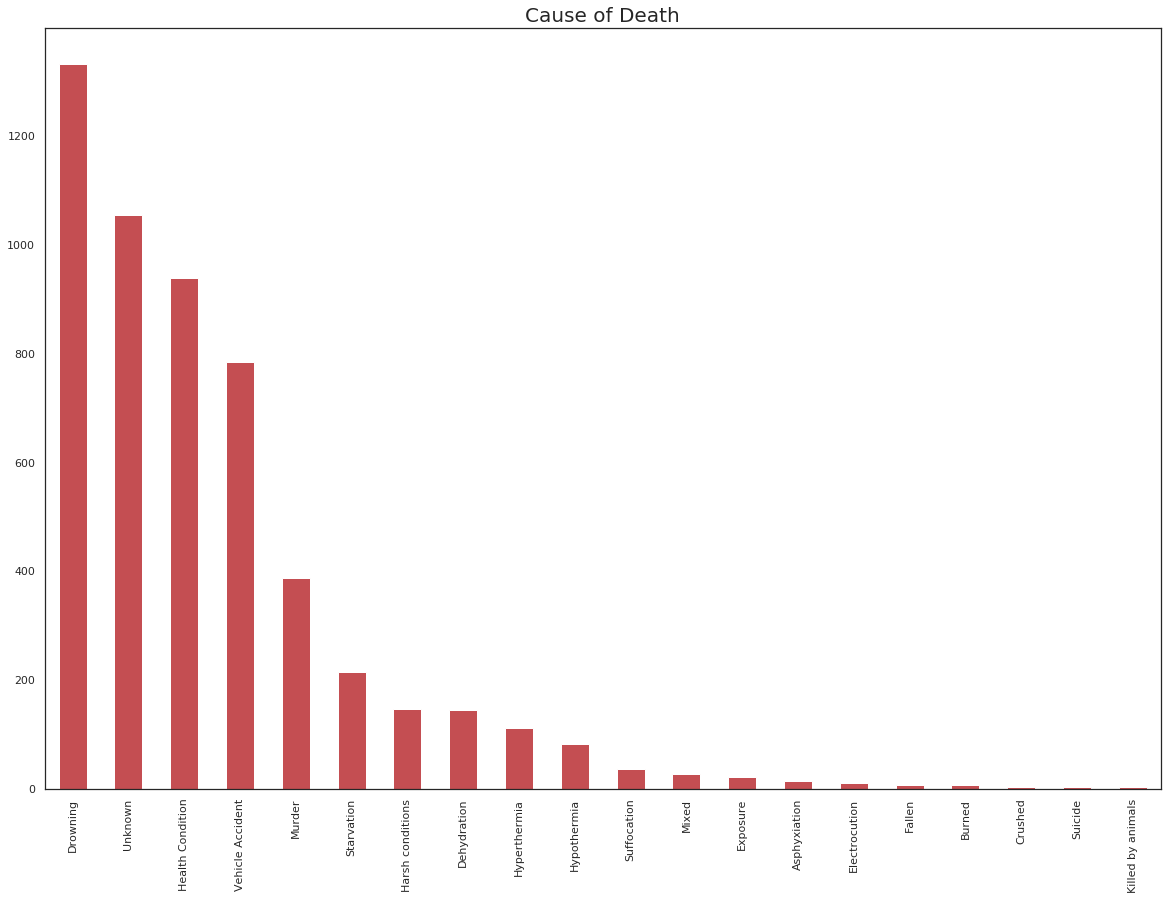

In [26]:
fig = plt.figure(figsize=(20, 14)) 
sns.set(style = 'white')
data['Cause of Death'].value_counts().plot(kind='bar', 
                                   color='r',
                                   align='center')
plt.title('Cause of Death', fontsize=20)
plt.show()

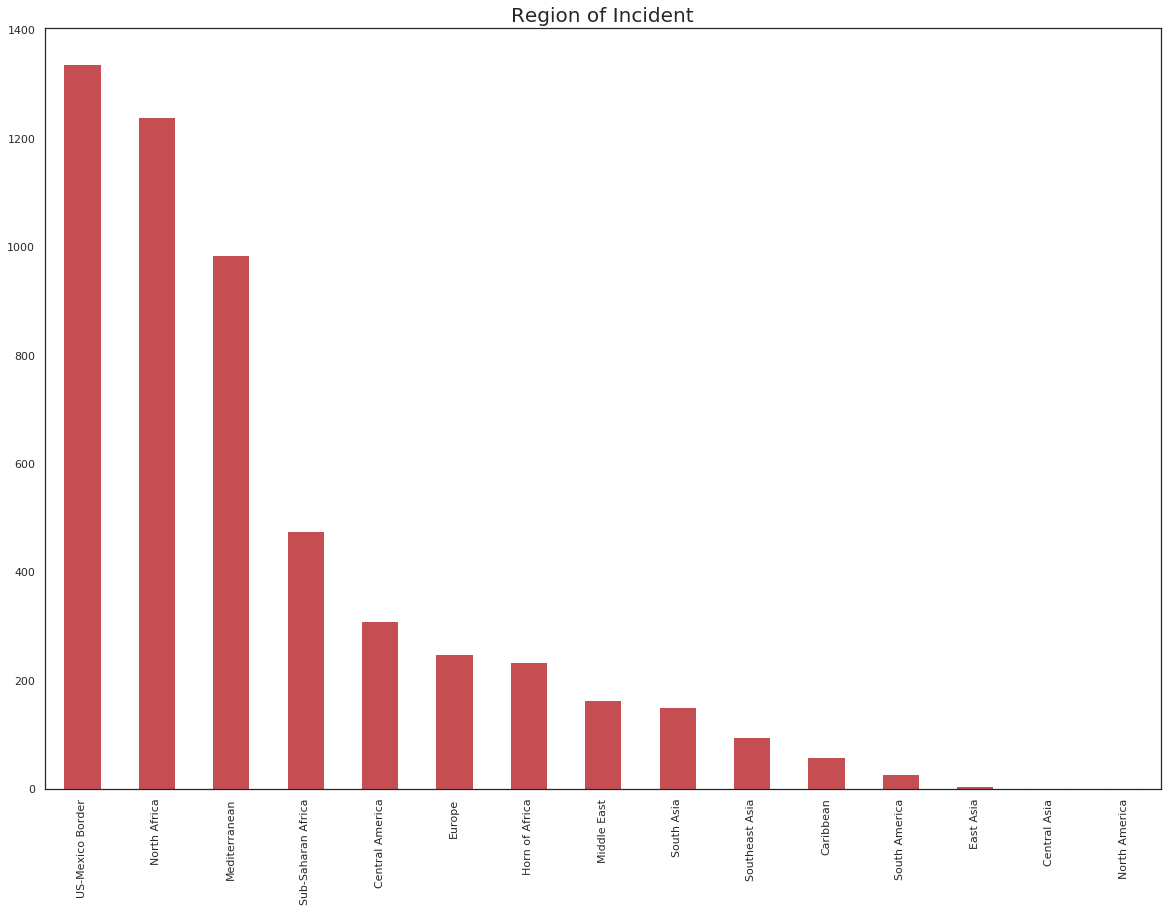

In [27]:
fig = plt.figure(figsize=(20, 14)) 
sns.set(style = 'white')
data['Region of Incident'].value_counts().plot(kind='bar', 
                                   color='r',
                                   align='center')
plt.title('Region of Incident', fontsize=20)
plt.show()

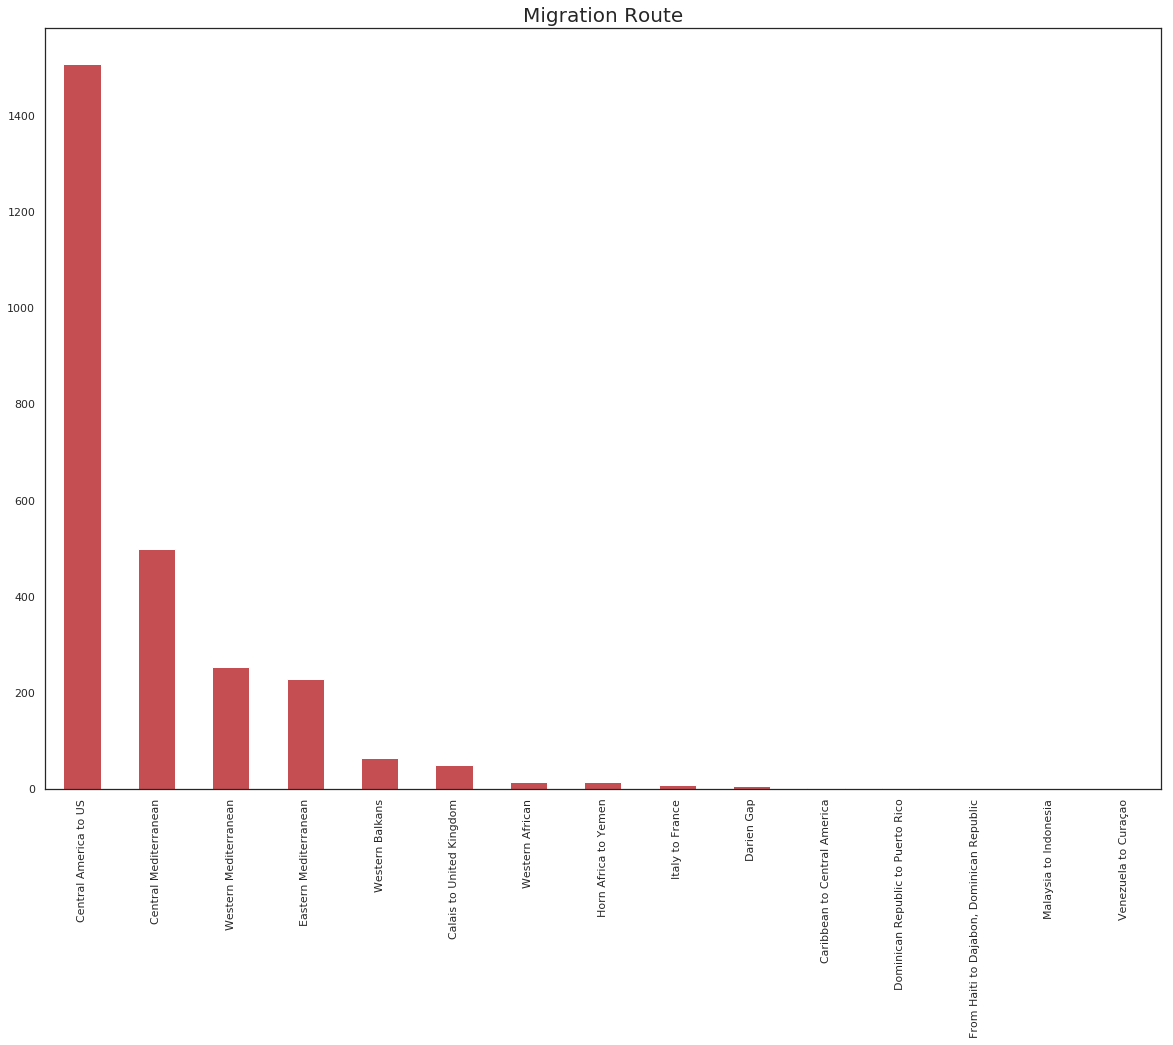

In [28]:
fig = plt.figure(figsize=(20, 14)) 
data['Migration Route'].value_counts().plot(kind='bar', 
                                   color='r',
                                   align='center')
plt.title('Migration Route', fontsize=20)
plt.show()

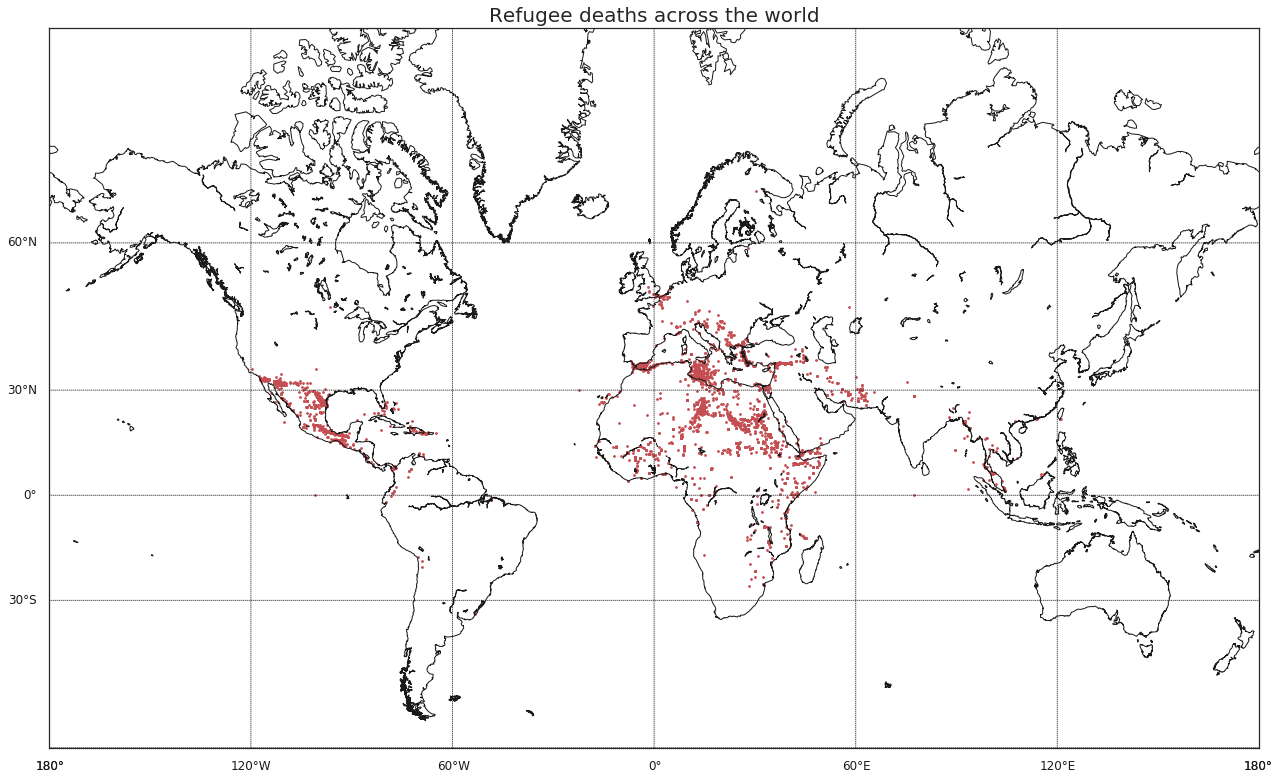

In [29]:
lat = data['Lat'][:]
lon = data['Lon'][:]
lat = lat.dropna()
lon = lon.dropna()
lat = np.array(lat)
lon = np.array(lon)

fig=plt.figure()
ax=fig.add_axes([1.0,1.0,2.8,2.8])
mapp = Basemap(llcrnrlon=-180.,llcrnrlat=-60.,urcrnrlon=180.,urcrnrlat=80.,
            rsphere=(6378137.00,6356752.3142),
            resolution='l',projection='merc',
            lat_0=40.,lon_0=-20.,lat_ts=20.)
mapp.drawcoastlines()
mapp.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
mapp.drawmeridians(np.arange(mapp.lonmin,mapp.lonmax+30,60),labels=[0,0,0,1])
x, y = mapp(lon,lat)
mapp.scatter(x,y,3,marker='o',color='r')
ax.set_title('Refugee deaths across the world', fontsize=20)
plt.show()

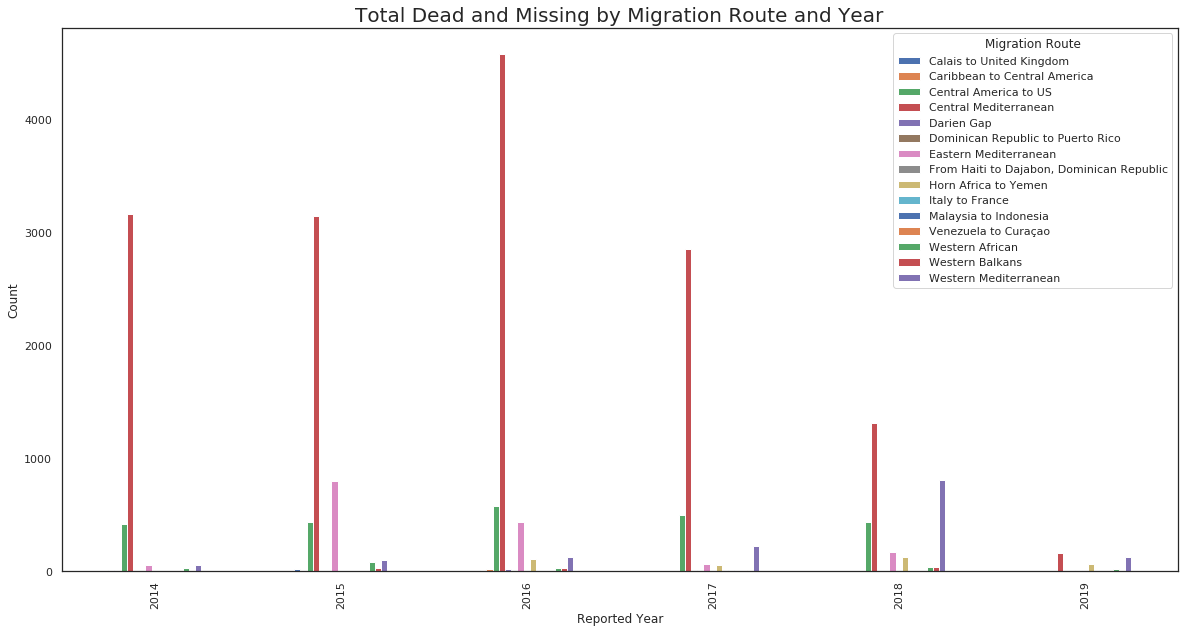

In [30]:
data.pivot_table('Total Dead and Missing', index='Reported Year', 
                               columns='Migration Route', aggfunc='sum').plot(figsize=(20, 10), kind='bar')
plt.ylabel('Count')
plt.title('Total Dead and Missing by Migration Route and Year', fontsize=20)
plt.show()

#### We had already had an idea, but these visualizations make us understand how tragic the situation in certain areas of the globe can be.
#### Note: I want to specify that the dataset does not contain all migratory routes and total deaths, as this data is not always accessible.

In [31]:
data.pivot_table('Total Dead and Missing', index='Migration Route', columns='Reported Year', aggfunc='sum')

Reported Year,2014,2015,2016,2017,2018,2019
Migration Route,,,,,,
Calais to United Kingdom,10.0,24.0,14.0,1.0,2.0,NaN
Caribbean to Central America,NaN,NaN,21.0,NaN,NaN,NaN
Central America to US,422.0,440.0,581.0,502.0,438.0,4.0
Central Mediterranean,3165.0,3149.0,4581.0,2853.0,1314.0,165.0
Darien Gap,NaN,2.0,19.0,7.0,NaN,NaN
Dominican Republic to Puerto Rico,NaN,NaN,NaN,13.0,NaN,NaN
Eastern Mediterranean,59.0,803.0,434.0,62.0,174.0,14.0
"From Haiti to Dajabon, Dominican Republic",NaN,NaN,NaN,1.0,NaN,NaN
Horn Africa to Yemen,NaN,NaN,109.0,53.0,125.0,70.0


# 7. The Mediterranean migratory routes

<img src='https://upload.wikimedia.org/wikipedia/commons/f/f4/Rotte_di_migranti_nel_mediterraneo.svg'>

#### Wikipedia page about migrant routes in the Mediterranean
#### https://it.wikipedia.org/wiki/Rotte_di_migranti_nel_Mediterraneo

In [32]:
mediterranean = data.loc[data['Region of Incident'] =='Mediterranean']

#### I take the data from 01/01/2014 to 12/31/2018, as 2019 is still incomplete and I wouldn't want to invalidate the data. Maybe I'll look at the latest data later.

In [33]:
mediterranean14_18 = mediterranean.loc[data['Reported Year'] < 2019]

In [34]:
mediterranean14_18.head(3)

,Region of Incident,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Cause of Death,Location Description,Information Source,Migration Route,Source Quality,Date,Lat,Lon
146,Mediterranean,2018,Dec,0.0,7.0,7.0,Drowning,"15 miles northeast of Cape Greco, Cyprus (boat...","Alarm Phone, Cyprus Mail",Eastern Mediterranean,4,2018-12-28,34.869024,34.492836
151,Mediterranean,2018,Dec,4.0,0.0,4.0,Drowning,Unspecified location off the coast of Morocco,Caminando Fronteras,Western Mediterranean,4,2018-12-24,35.481681,-3.342111
152,Mediterranean,2018,Dec,0.0,2.0,2.0,Unknown,"Unspecified location in the Alboran Sea, bodie...","Cruz Roja Española, Caminando Fronteras",Western Mediterranean,4,2018-12-23,36.175539,-3.432980


In [35]:
valueCounts(mediterranean14_18, ['Migration Route'])

Central Mediterranean    483
Western Mediterranean    234
Eastern Mediterranean    222
Name: Migration Route, dtype: int64
------------------------------


#### About half of the Mediterranean route accidents occurred in the Central Route.

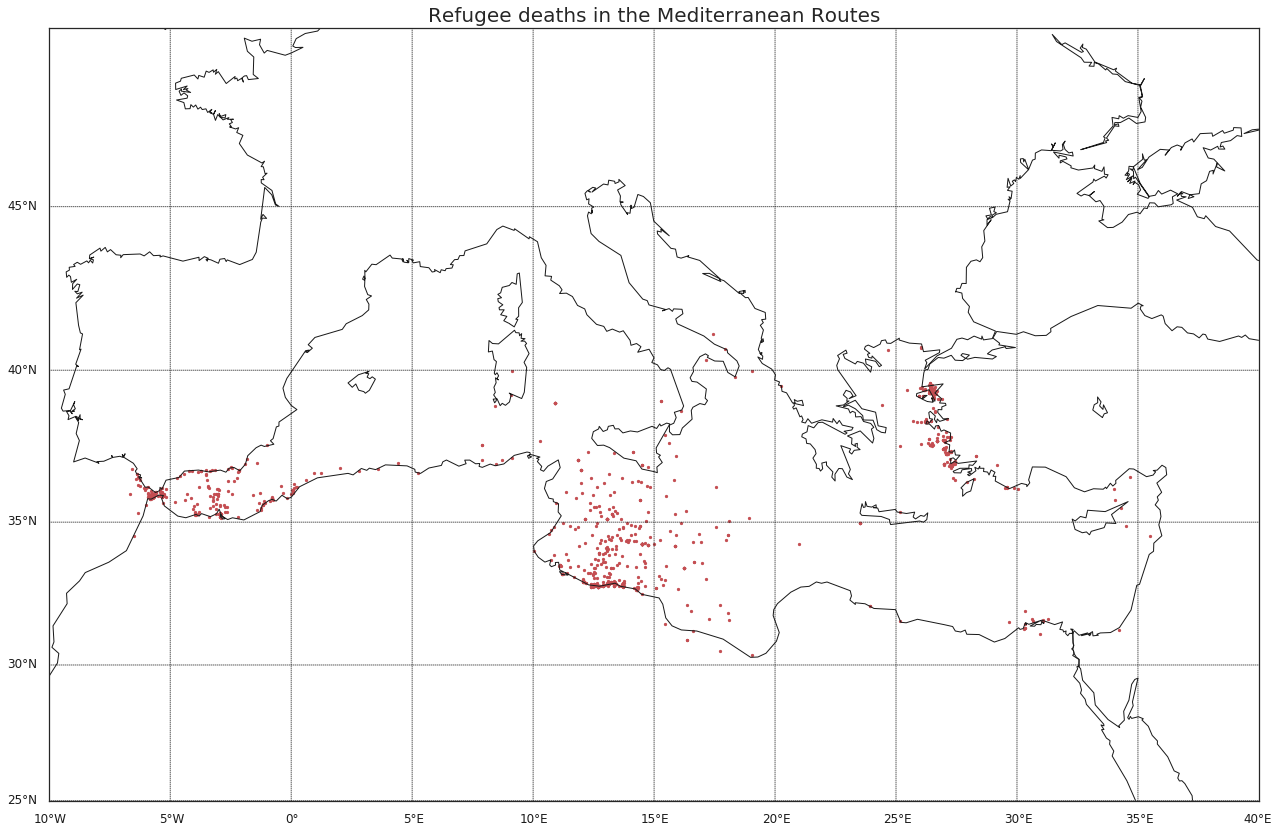

In [36]:
lat = mediterranean14_18['Lat'][:]
lon = mediterranean14_18['Lon'][:]
lat = lat.dropna()
lon = lon.dropna()
lat = np.array(lat)
lon = np.array(lon)

fig=plt.figure()
ax=fig.add_axes([1.0,1.0,2.8,2.8])
mapp = Basemap(llcrnrlon=-10.,llcrnrlat=25.,urcrnrlon=40.,urcrnrlat=50.,
            rsphere=(6378137.00,6356752.3142),
            resolution='l',projection='merc',
            lat_0=40.,lon_0=-20.,lat_ts=20.)
mapp.drawcoastlines()
mapp.drawparallels(np.arange(25,55,5),labels=[1,0,0,0])
mapp.drawmeridians(np.arange(-20,55,5),labels=[0,0,0,1])
x, y = mapp(lon,lat)
mapp.scatter(x,y,5,marker='o',color='r')
ax.set_title('Refugee deaths in the Mediterranean Routes', fontsize=20)
plt.show()

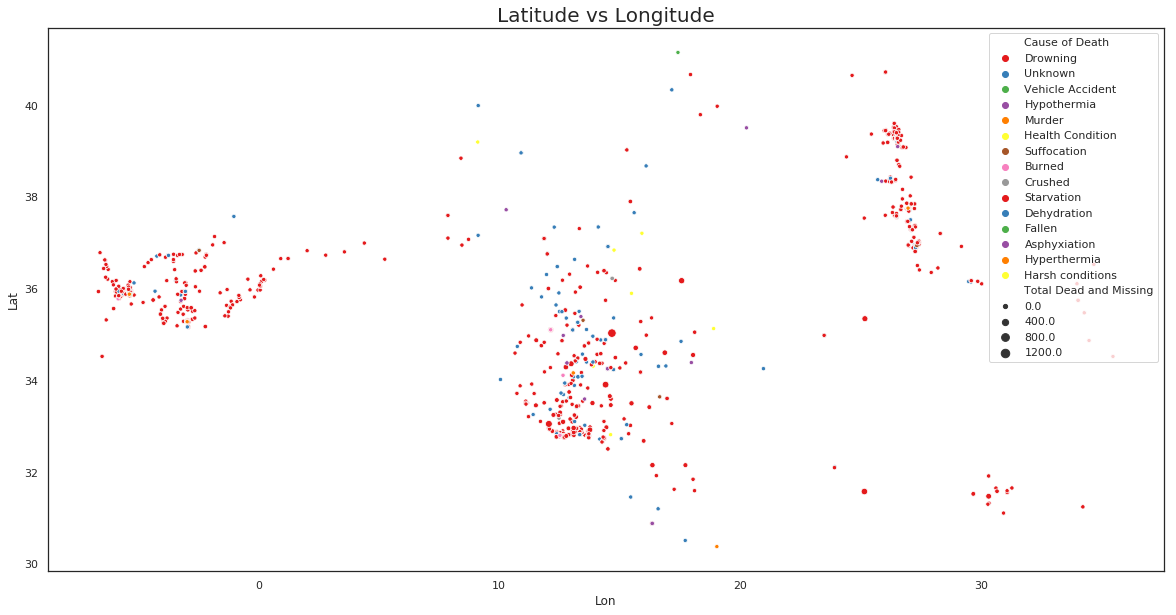

In [37]:
plt.figure(figsize=(20,10))
sns.scatterplot('Lon','Lat',hue='Cause of Death',size='Total Dead and Missing', data=mediterranean14_18, palette='Set1')
plt.title('Latitude vs Longitude', fontsize=20)
plt.show()

#### As a Sardinian, I was surprised to see some points in Sardinia. Therefore I decided to investigate these events further.

### Dead in Sardinia.
#### 1) web ID 40607 (Cagliari) 19-12-2015
http://www.ansa.it/sardegna/notizie/2015/12/19/tenta-fuga-da-ospedale-muore-eritreo_e9f4f8da-4058-4a54-83a8-0fd8c8e29b11.html
#### 2) web ID 42607 (Cagliari) 21-05-2016
https://www.ilmessaggero.it/primopiano/cronaca/migranti_sardegna_guardia_costiera-1747870.html
#### 3) web ID 46079 (Isola del Toro) 15-11-2018
https://tg24.sky.it/cronaca/2018/11/16/migranti-naufragio-sardegna.html

#### How reliable are the sources concerning the Routes in the Mediterranean?

In [38]:
valueCounts(mediterranean14_18,['Source Quality'])

4    465
1    196
5    157
3    120
2      1
Name: Source Quality, dtype: int64
------------------------------


In [39]:
unreliableData = (197*100)/len(mediterranean14_18)
print('Unreliable Data: %f percent' % unreliableData)

Unreliable Data: 20.979766 percent


|Variable Name|Description|
|-------------|-----------|
|Source quality|Incidents are ranked on a scale from 1-5 based on the source(s) of information available. Incidents ranked as level 1 are based on information from only one media source. Incidents ranked as level 2 are based on information from uncorroborated eyewitness accounts or data from survey respondents. Incidents ranked as level 3 are based on information from multiple media reports, while level 4 incidents are based on information from at least one NGO, IGO, or another humanitarian actor with direct knowledge of the incident. Incidents ranked at level 5 are based on information from official sources such as coroners, medical examiners, or government officials OR from multiple humanitarian actors.

It is possible to affirm that most of the data concerning the migratory routes in the Mediterranean is quite reliable (scores 3,4,5).
#### The chart below gives us further confirmation.

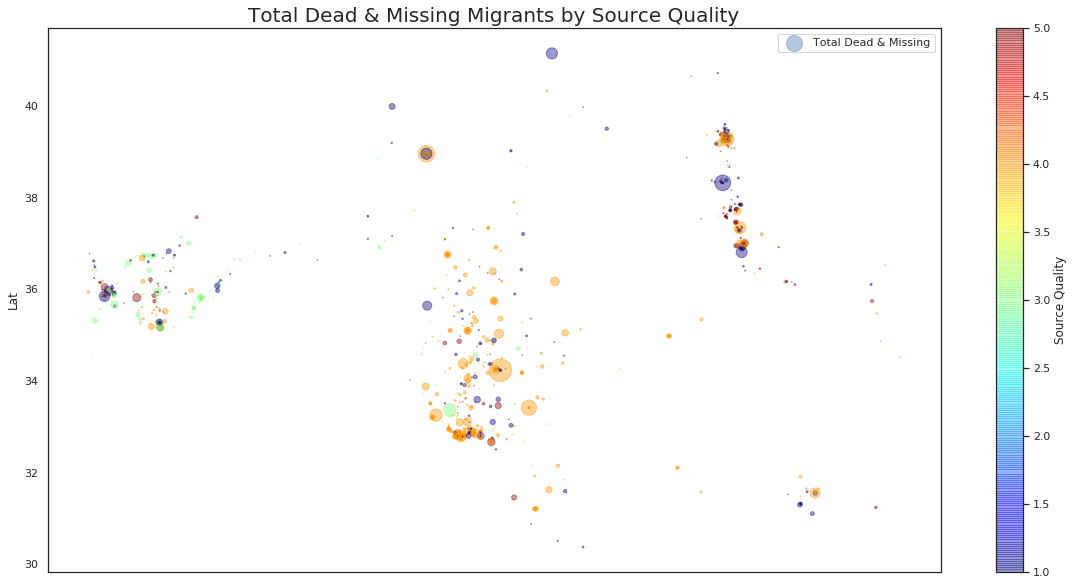

In [40]:
mediterranean.plot(kind='scatter',x='Lon',y='Lat',alpha=0.4,
                   s=mediterranean14_18['Total Dead and Missing']/2, label='Total Dead & Missing',
                   figsize=(20,10),c='Source Quality', cmap=plt.get_cmap('jet'), colorbar=True)
plt.title('Total Dead & Missing Migrants by Source Quality', fontsize=20)
plt.show()

In [41]:
mediterranean14_18.describe()

,Reported Year,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Source Quality,Lat,Lon
count,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000
mean,2016.330138,6.434505,12.647497,19.082002,3.411076,35.515333,12.744846
std,1.233703,28.010520,44.948043,57.444055,1.353872,2.130540,11.204924
min,2014.000000,0.000000,0.000000,0.000000,1.000000,30.375664,-6.646877
25%,2015.000000,1.000000,0.000000,1.000000,3.000000,33.582121,3.982120
50%,2016.000000,2.000000,0.000000,4.000000,4.000000,35.698609,13.186773
75%,2017.000000,5.000000,3.000000,11.000000,4.000000,36.945338,25.174472
max,2018.000000,750.000000,550.000000,1022.000000,5.000000,41.150242,35.486568


In [42]:
years = [2014,2015,2016,2017,2018]
mRoutes = ['Western Mediterranean','Central Mediterranean','Eastern Mediterranean']

for year in years:
    print('Year: %d' % year)
    for mroute in mRoutes:
        m = mediterranean.loc[(mediterranean['Migration Route'] == mroute) & (mediterranean['Reported Year'] == year)]
        print('_'*40)
        print('Migration Route: %s' %mroute)
        print('Total death & missing: ', m['Total Dead and Missing'].sum())
        print('Total death : ', m['Number Dead'].sum())
    m1= mediterranean.loc[mediterranean['Reported Year'] == year]
    print('_'*40)
    print('Total death & missing: ', m1['Total Dead and Missing'].sum())
    print('Total death : ', m1['Number Dead'].sum())
    print('*'*40)

Year: 2014
________________________________________
Migration Route: Western Mediterranean
Total death & missing:  59.0
Total death :  30.0
________________________________________
Migration Route: Central Mediterranean
Total death & missing:  3165.0
Total death :  672.0
________________________________________
Migration Route: Eastern Mediterranean
Total death & missing:  59.0
Total death :  23.0
________________________________________
Total death & missing:  3283.0
Total death :  725.0
****************************************
Year: 2015
________________________________________
Migration Route: Western Mediterranean
Total death & missing:  102.0
Total death :  43.0
________________________________________
Migration Route: Central Mediterranean
Total death & missing:  3149.0
Total death :  1562.0
________________________________________
Migration Route: Eastern Mediterranean
Total death & missing:  803.0
Total death :  570.0
________________________________________
Total death & missi

#### Now I create some pivot tables so that I can study some data.

In [43]:
mediterranean14_18.pivot_table('Total Dead and Missing', index='Migration Route', aggfunc='sum')

,Total Dead and Missing
Migration Route,
Central Mediterranean,15062.0
Eastern Mediterranean,1532.0
Western Mediterranean,1324.0


In [44]:
mediterranean14_18.pivot_table('Number Dead', index='Migration Route', aggfunc='sum')

,Number Dead
Migration Route,
Central Mediterranean,4445.0
Eastern Mediterranean,1075.0
Western Mediterranean,522.0


#### NOTE: I want to clarify one thing immediately: The 'Total Dead and Missing' feature is precisely the sum of the dead or missing migrants. However, to be missing in the middle of the sea, unfortunately it is similar to calling it dead.

More than 15000 people died only in the Central Mediterranean Route in the years between 2014 and 2018.

In [45]:
mediterranean14_18.pivot_table('Total Dead and Missing', index='Migration Route', columns='Reported Year', aggfunc='sum')

Reported Year,2014,2015,2016,2017,2018
Migration Route,,,,,
Central Mediterranean,3165.0,3149.0,4581.0,2853.0,1314.0
Eastern Mediterranean,59.0,803.0,434.0,62.0,174.0
Western Mediterranean,59.0,102.0,128.0,224.0,811.0


The number appears to be falling. This is probably due to political actions starting in 2017 in Italy. (I will report the sources).

#### However, it is correct to point out that the reduction of deaths is related to the sharp reduction in departures from the Libyan coast. The absolute number of deaths has fallen. This with regards to Mediterranean routes. Afterwards it will be necessary, however difficult, to analyze the evolution of the African routes.

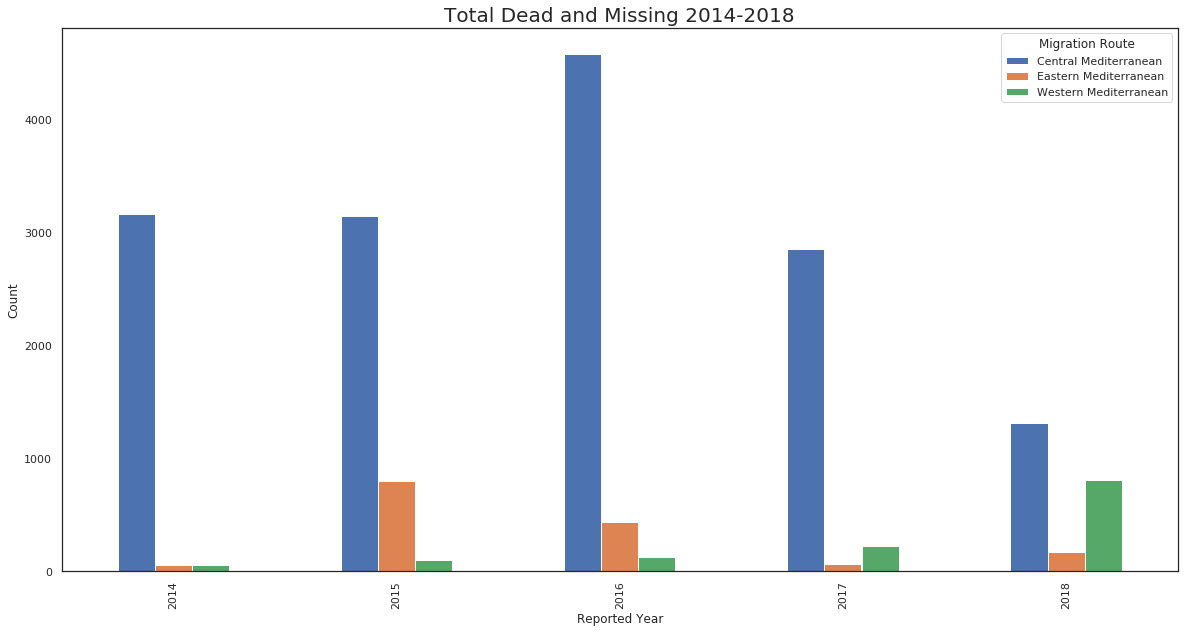

In [46]:
mediterranean14_18.pivot_table('Total Dead and Missing', index='Reported Year', 
                               columns='Migration Route', aggfunc='sum').plot(figsize=(20, 10), kind='bar')
plt.ylabel('Count')
plt.title('Total Dead and Missing 2014-2018', fontsize=20)
plt.show()

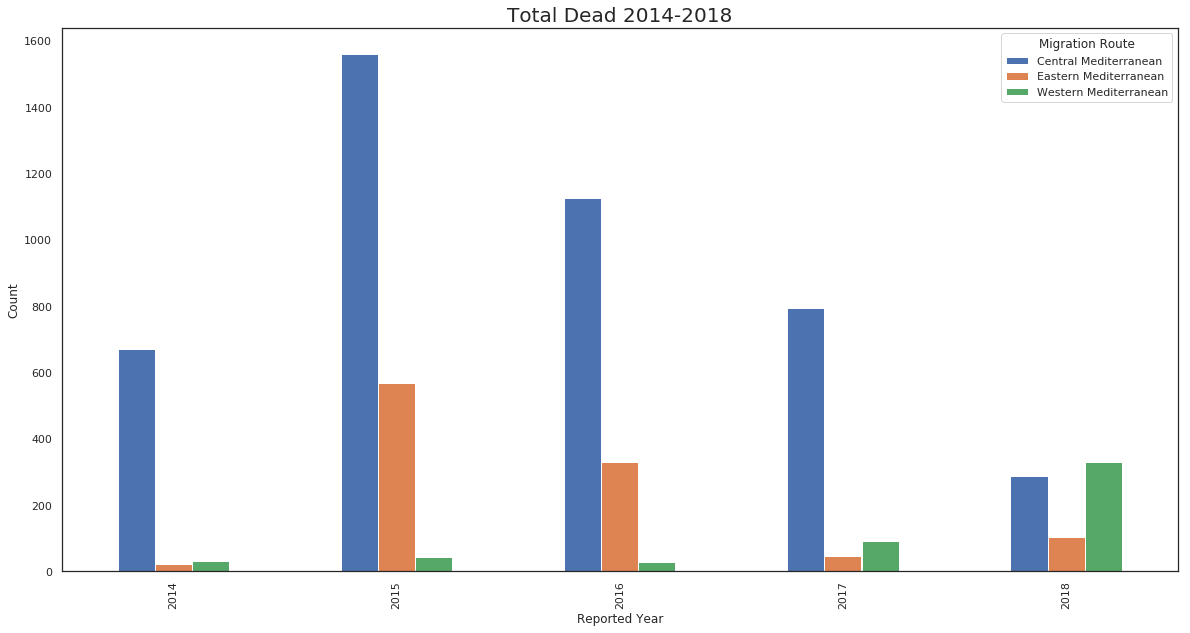

In [47]:
mediterranean14_18.pivot_table('Number Dead', index='Reported Year', 
                               columns='Migration Route', aggfunc='sum').plot(figsize=(20, 10), kind='bar')
plt.ylabel('Count')
plt.title('Total Dead 2014-2018', fontsize=20)
plt.show()

# 8. Exploring Africa (I have to do some research)

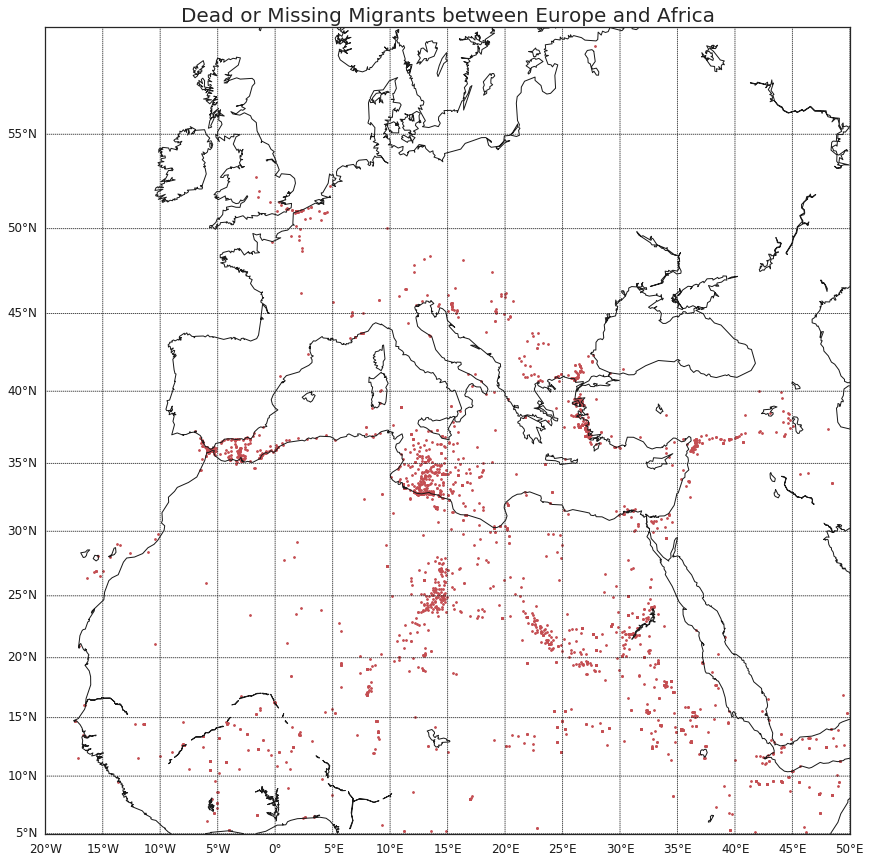

In [48]:
lat = data['Lat'][:]
lon = data['Lon'][:]
lat = lat.dropna()
lon = lon.dropna()
lat = np.array(lat)
lon = np.array(lon)

fig=plt.figure()
ax=fig.add_axes([1.0,1.0,2.8,2.8])
map = Basemap(llcrnrlon=-20.,llcrnrlat=5.,urcrnrlon=50.,urcrnrlat=60.,
            rsphere=(6378137.00,6356752.3142),
            resolution='l',projection='merc',
            lat_0=40.,lon_0=-20.,lat_ts=20.)
map.drawcoastlines()
map.drawparallels(np.arange(5,65,5),labels=[1,0,0,0])
map.drawmeridians(np.arange(-20,55,5),labels=[0,0,0,1])
x, y = map(lon,lat)
map.scatter(x,y,3,marker='o',color='r')
ax.set_title('Dead or Missing Migrants between Europe and Africa', fontsize=20)
plt.show()

# Conclusion

## I hope you enjoy this kernel. This is not only meant to be a demonstration kernel, but also a tool to learn more about these events. They are tragedies that happen every day, we should at least know them, to prevent them from happening again.

## If you liked the kernel, please give me an upvote.